In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [3]:
A = np.array([ [1, 2, 3], [4, 5, 6], [7, 8, 9] ])
B = np.array([2, 5, 11])
Q, R = np.linalg.qr(A)

print(A)
print(Q)
print(R)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[-0.12309149  0.90453403  0.40824829]
 [-0.49236596  0.30151134 -0.81649658]
 [-0.86164044 -0.30151134  0.40824829]]
[[-8.12403840e+00 -9.60113630e+00 -1.10782342e+01]
 [ 0.00000000e+00  9.04534034e-01  1.80906807e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.77635684e-15]]


In [4]:
print(np.dot(Q, R))
print(np.dot(np.transpose(Q), Q))

[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
[[ 1.00000000e+00 -5.55111512e-16 -2.77555756e-16]
 [-5.55111512e-16  1.00000000e+00  5.68989300e-16]
 [-2.77555756e-16  5.68989300e-16  1.00000000e+00]]


In [5]:
R1 = R[:2, :2]
R1

array([[-8.1240384 , -9.6011363 ],
       [ 0.        ,  0.90453403]])

In [6]:
B1 = np.dot(np.transpose(Q), B)[:2]
B1

array([-1.21860576e+01,  8.43769499e-15])

In [7]:
X1 = np.linalg.solve(R1, B1)
X1

array([1.50000000e+00, 9.32822279e-15])

In [8]:
X = np.append(X1, 0)
print (X)
np.linalg.norm(X)

[1.50000000e+00 9.32822279e-15 0.00000000e+00]


1.4999999999999896

Одно из псевдорешений исходной вырожденной СЛАУ:  
$\left(
\begin{array}{cccc}
1.5\\0\\0
\end{array}
\right)$

In [47]:
print(np.linalg.norm(np.dot(A, X) - B))

1.224744871391589


Чтобы найти нормальное псевдорешение, нужно при минимуме нормы невязки минимизировать норму вектора X.
Компоненты вектора X найдем из уравнения:  
$R_1 \cdot X_1 = Q^T \cdot B - R_2 \cdot X_2$  
В нашем случае это уравнение примет вид:  
$\left(
\begin{array}{cccc}
-8.12 & -9.6\\
0 & 0.9\end{array}
\right) \cdot \left(
\begin{array}{cccc}
x\\y\end{array}
\right) = \left(
\begin{array}{cccc}
-12.19\\0\end{array}
\right) - \left(
\begin{array}{cccc}
-11.08\\1.8\end{array}
\right) \cdot \left(
\begin{array}{cccc}
z\end{array}
\right)$  
$\left(
\begin{array}{cccc}
-8.12x - 9.6y\\0.9y\end{array}
\right) = \left(
\begin{array}{cccc}
-12.19 + 11.08z\\-1.8z\end{array}
\right)$  
Отсюда, $0.9y = -1.8z, y = -2z$ и  
$-8.12x - 9.6y = -12.19 + 11.08z, x = z + 1.5$

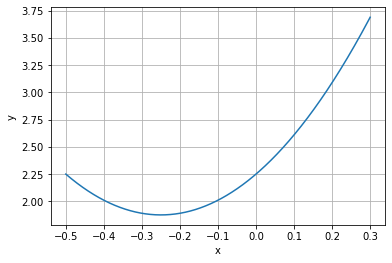

In [43]:
def Q(x, y, z):
    return (x**2 + y**2 + z**2)

x = np.linspace(-0.5, 0.3, 2001)
plt.plot(x, Q(1.5 + x, - 2 * x, x))
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

In [44]:
def Q(z):
    return ((1.5 + z)**2 + (- 2 * z)**2 + z**2)
print(minimize(Q, -0.25))

      fun: 1.875
 hess_inv: array([[1]])
      jac: array([8.94069672e-08])
  message: 'Optimization terminated successfully.'
     nfev: 2
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([-0.25])


In [45]:
X = np.array([1.25, 0.5, -0.25])
np.linalg.norm(X)

1.3693063937629153

In [46]:
print(np.linalg.norm(np.dot(A, X) - B))

1.224744871391589


Нормальное псевдорешение исходной вырожденной СЛАУ:  
$\left(
\begin{array}{cccc}
1.25\\0.5\\-0.25
\end{array}
\right)$